In [67]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("df_test3.1.csv")

In [11]:
df.head()

,Unnamed: 0,par_id,art_id,keyword,country,text,label,orig_label,label_class,len_text,unbalanced_power,shallow_solution,presupposition,authority_voice,metaphor,compassion,the_poorer_merrier,y_pred
0,1513,1514,@@17670891,refugee,my,"""Gottberg once wrote that the Holocaust was us...",0,0,"[0, 0, 0, 0, 0, 0, 0]",225,0,0,0,0,0,0,0,0
1,4126,4127,@@10019917,homeless,tz,According to the Dar es Salaam master plan whi...,0,0,"[0, 0, 0, 0, 0, 0, 0]",203,0,0,0,0,0,0,0,0
2,2293,2294,@@8422356,disabled,gb,Lukas ' mum Vicki was given a parking ticket f...,0,0,"[0, 0, 0, 0, 0, 0, 0]",193,0,0,0,0,0,0,0,0
3,6122,6123,@@9699513,vulnerable,ke,""""""" We should learn from history and Mr Namwam...",0,0,"[0, 0, 0, 0, 0, 0, 0]",257,0,0,0,0,0,0,0,0
4,2983,2984,@@14457280,poor-families,bd,She said since Bangladeshs main export to the ...,1,3,[0 0 1 0 1 0 0],427,0,0,1,0,1,0,0,1


In [10]:
#df[['']]

In [21]:
df_label1 = df[df['orig_label'] == 1]
df_label2 = df[df['orig_label'] == 2]
df_label3 = df[df['orig_label'] == 3]
df_label4 = df[df['orig_label'] == 4]

In [22]:
df_label1['y_pred'].mean()

0.17293233082706766

In [17]:
df_label2['y_pred'].mean()

0.25

In [18]:
df_label3['y_pred'].mean()

0.676056338028169

In [19]:
df_label4['y_pred'].mean()

0.8813559322033898

In [30]:
result = df[['orig_label', 'y_pred']].groupby(['orig_label']).agg(['mean']).reset_index()

In [32]:
result.columns = ['original label', 'Y prediction percentage']
result['Y prediction percentage'] = round(result['Y prediction percentage'] * 100, 2)


In [33]:
result

,original label,Y prediction percentage
0,0,4.85
1,1,17.29
2,2,25.00
3,3,67.61
4,4,88.14


Text(0, 0.5, 'Percentage of predicted as condescending')

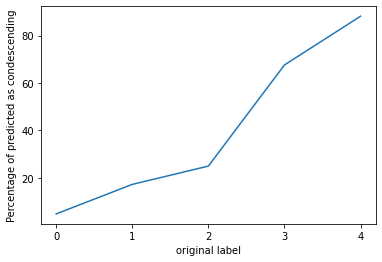

In [43]:
g = sns.lineplot(data=result, x="original label", y="Y prediction percentage")
g.set_xticks(range(5))
g.set_xticklabels(['0', '1', '2', '3', '4'])
g.set_ylabel("Percentage of predicted as condescending")

In [72]:
result = df[['label', 'y_pred', 'keyword']].groupby(['keyword']).agg(['mean']).reset_index()
result.columns = ['keyword', 'Y actual proportion', 'Y prediction proportion']
result['Y actual proportion'] = round(result['Y actual proportion'] * 100, 2)
result['Y prediction proportion'] = round(result['Y prediction proportion'] * 100, 2)


In [73]:
result

,keyword,Y actual proportion,Y prediction proportion
0,disabled,6.75,4.91
1,homeless,20.12,26.04
2,hopeless,9.66,13.79
3,immigrant,5.37,5.37
4,in-need,16.67,21.43
5,migrant,4.19,3.59
6,poor-families,21.74,25.36
7,refugee,8.43,9.64
8,vulnerable,5.44,8.16
9,women,2.53,4.43


In [74]:
result2 = result.melt('keyword', var_name='categories', value_name='Percentage of predicted as condescending')

In [75]:
#result2

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'disabled'),
  Text(1, 0, 'homeless'),
  Text(2, 0, 'hopeless'),
  Text(3, 0, 'immigrant'),
  Text(4, 0, 'in-need'),
  Text(5, 0, 'migrant'),
  Text(6, 0, 'poor-families'),
  Text(7, 0, 'refugee'),
  Text(8, 0, 'vulnerable'),
  Text(9, 0, 'women')])

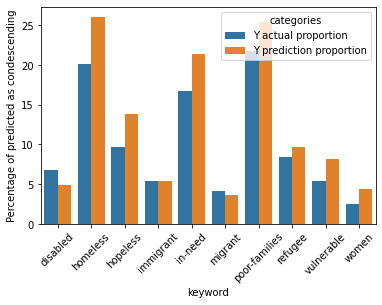

In [77]:
g = sns.barplot(data=result2, x="keyword", y="Percentage of predicted as condescending", hue='categories')
plt.xticks(rotation=45)

In [78]:
result = df[['label', 'y_pred', 'country']].groupby(['country']).agg(['mean']).reset_index()
result.columns = ['country', 'Y actual proportion', 'Y prediction proportion']
result['Y actual proportion'] = round(result['Y actual proportion'] * 100, 2)
result['Y prediction proportion'] = round(result['Y prediction proportion'] * 100, 2)


In [80]:
result2 = result.melt('country', var_name='categories', value_name='Percentage of predicted as condescending')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'au'),
  Text(1, 0, 'bd'),
  Text(2, 0, 'ca'),
  Text(3, 0, 'gb'),
  Text(4, 0, 'gh'),
  Text(5, 0, 'hk'),
  Text(6, 0, 'ie'),
  Text(7, 0, 'in'),
  Text(8, 0, 'jm'),
  Text(9, 0, 'ke'),
  Text(10, 0, 'lk'),
  Text(11, 0, 'my'),
  Text(12, 0, 'ng'),
  Text(13, 0, 'nz'),
  Text(14, 0, 'ph'),
  Text(15, 0, 'pk'),
  Text(16, 0, 'sg'),
  Text(17, 0, 'tz'),
  Text(18, 0, 'us'),
  Text(19, 0, 'za')])

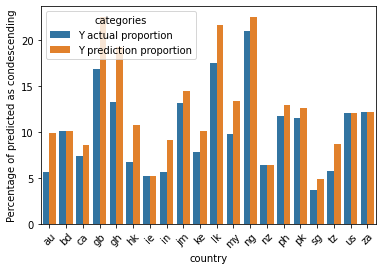

In [83]:
g = sns.barplot(data=result2, x="country", y="Percentage of predicted as condescending", hue='categories')
plt.xticks(rotation=45)